<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>

<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Regresion Lineal Production</center></b></font>

<b><font face = "Times New Roman" size = "5"><center>Final Proyect</center></font>
<div align="right"><font face = "Times New Roman" size = "2">nombres: Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jorge Arturo Ponce Martin</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jesus Vargas Pacheco</font></div>
</span></div>

In [4]:
#####################################################
#
# APLICAR Regresión lineal a datos NUEVOS preprocesados con PCA
#
#####################################################
# Deben cargarse los archivos
# - T_new_final.csv (son los datos nuevos ya preprocesados con PCA)
# - expected_columns.json
# - modelo_reg_lineal.pkl
#
# Devolverá
# Regresion_lineal_nuevos_predicciones.csv: csv de T_new_final con las predicciones de la regresión lineal
#####################################################

# ===== Carga del modelo y predicción en datos nuevos =====
import pandas as pd
import joblib, json

# Cargar artefactos
########################################################################
modelo = joblib.load("../regression_lineal/modelo_reg_lineal.pkl")
with open("../regression_lineal/expected_columns.json", "r", encoding="utf-8") as f:
########################################################################
    expected_cols = json.load(f)["columns"]

# Usar en un lote nuevo
#################################################################################################
df_nuevo = pd.read_csv("../../01_preprocessing_results/preprocessing_production/T_new_final.csv")
##################################################################################################
y_pred  = modelo.predict(df_nuevo)

out = df_nuevo.copy()
out["yhat"] = y_pred
out.to_csv("Regresion_lineal_nuevos_predicciones.csv", index=False)
print("✅ Predicciones guardadas en: Regresion_lineal_nuevos_predicciones.csv")


✅ Predicciones guardadas en: Regresion_lineal_nuevos_predicciones.csv


✅ Predicciones guardadas correctamente.


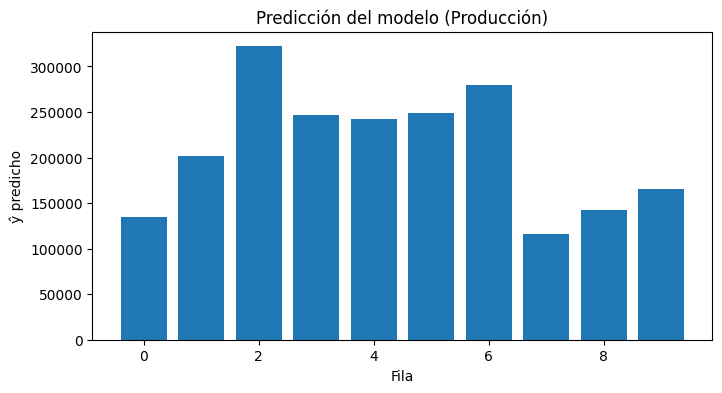

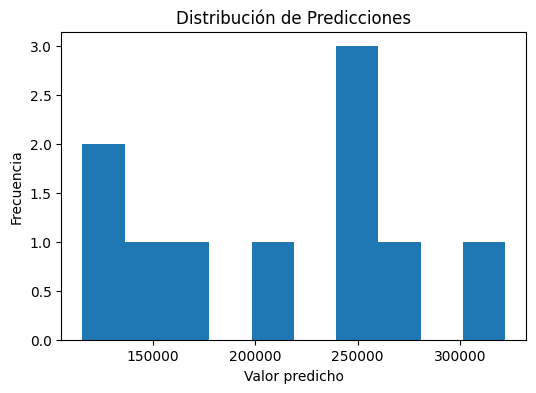

In [5]:
import pandas as pd
import joblib, json
import matplotlib.pyplot as plt

# ===== Cargar modelo entrenado =====
modelo = joblib.load("../regression_lineal/modelo_reg_lineal.pkl")

# ===== Cargar datos nuevos ya preprocesados =====
df_nuevo = pd.read_csv("../../01_preprocessing_results/preprocessing_production/T_new_final.csv")

# ===== Generar predicciones =====
y_pred = modelo.predict(df_nuevo)

# ===== Guardar CSV final =====
out = df_nuevo.copy()
out["yhat"] = y_pred
out.to_csv("Regresion_lineal_nuevos_predicciones.csv", index=False)

print("✅ Predicciones guardadas correctamente.")

# ===== Gráfico de predicciones =====
plt.figure(figsize=(8,4))
plt.bar(range(len(y_pred)), y_pred)
plt.title("Predicción del modelo (Producción)")
plt.xlabel("Fila")
plt.ylabel("ŷ predicho")
plt.show()

# ===== Histograma de predicciones =====
plt.figure(figsize=(6,4))
plt.hist(y_pred, bins=10)
plt.title("Distribución de Predicciones")
plt.xlabel("Valor predicho")
plt.ylabel("Frecuencia")
plt.show()


In [6]:
out = df_nuevo.copy()
out["yhat"] = y_pred

out.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,heating___electric,heating___hot air,...,sewer___none,sewer___public/commercial,sewer___septic,waterfront___No,waterfront___Yes,newConstruction___No,newConstruction___Yes,centralAir___No,centralAir___Yes,yhat
0,-1.905764,0.266144,1.022320,0.168308,-0.258120,-0.460221,0.535150,0.658734,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,134873.840486
1,1.159719,-0.761804,-0.909746,0.376705,-0.876126,-0.042257,0.401184,-0.496953,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,201258.325076
2,2.898206,-0.079321,-0.177984,-0.608690,-0.464261,-0.411519,-0.478531,-0.768703,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,322080.344903
3,1.737947,0.421540,0.292222,-0.020164,-0.664596,0.260617,0.535103,0.279524,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,247046.656888
4,1.872174,-0.081409,0.664935,0.486500,-0.750387,1.817104,-0.407539,0.576972,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,242739.750073
5,2.604294,0.842840,0.212242,-0.822322,-1.252775,-0.201655,-0.321889,0.262750,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,249178.599298
6,2.477326,0.845647,-0.011809,0.120092,-0.586127,-0.100111,0.089898,-0.575221,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,280042.624614
7,-2.868784,-0.813204,-0.410343,0.253822,0.446382,-0.362790,-0.243518,0.251302,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,115699.008398
8,-1.198604,0.472026,0.376708,-0.123120,-0.461421,1.070770,-0.945298,-0.247469,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,142373.631735
9,-1.436986,1.870052,0.903307,-0.068640,0.261806,0.006589,0.228083,-0.149723,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,165880.952676
